TokaMaker Example: NSTX-U Shape Control Simulator
==========
In this example we demonstrate how to use the TokaMaker framework to simulate shape control in NSTX-U.

If you run this simulation with the default parameters, the plasma will slowly drift outwards as the Central Solenoid is ramped. See if you can adjust the shape control parameters to maintain the original shape!

## Set the simulation input parameters

Before running the simulation, the user needs to specify a variety of parameters to set up the initial plasma state, define the desired target shape, and set the PID gains for the shape control algorithm.

In [3]:
import numpy as np

inputs = dict(
        
        # Set points used to generate time-dependent target waveforms have the format
        # [time, value] for single parameters or [time, R, Z] for coordinates.
        
        
        ###################################################
        
        # Output Directory
        odir = 'IODATA/TEST/',
        
        # Maximum Simulation Time [s]
        t_max = 100.0e-3,  
        
        # Simulation time base [s]
        dt_PCS = 0.2e-3,
        
        # ISOFLUX time base [s]
        dt_ISO = 2.0e-3,
        
        # Linear and nonlinear tolerances for Grad Shafranov solver
        lin_tol = 1.0e-13,
        nl_tol = 1.0e-5,
        
        ###################################################
        
        
        
        ###################################################
        
        # IP / OH control
        # Not a self-consistent model!
        
        # Ip set points [A]
        IPOH_IP = np.array([[0, 1.0e6], ]),
        
        # OH coil current [A]
        IPOH_IOH = np.array([[0,-5.0e3], [1,-17.0e3]]),
        
        
        ###################################################
        
        
        
        ###################################################
        
        # Pressure Constraint on initial equilibrium
        flag_pres = 1, # 1 = peak pressure, 2 = beta_p
        
        # Peak Pressure [Pa]
        PRES = np.array([[0, 20.0e3], ]),
        
        # Poloidal Beta [%]
        BETAP = np.array([[0, 0], ]),
        
        ###################################################
        
        
        
        ###################################################
        # Initial Plasma Shape
        
        # Starting plasma shape (1 = gfile, 2 = cartoon)
        flag_shape = 2, 
        
        # gfile to load shape from
        gfile_shape = 'path_to_gfile',
        
        # Cartoon shape parameters
        null_type = 'LSN', # DN, USN, LSN, LIM
        N_points = 10,
        R0_target = 0.95,
        Z0_target = -0.001,
        a_target = 0.55,
        kappa_upper_target = 2.0,
        kappa_lower_target = 2.4,
        delta_upper_target = 0.6,
        delta_lower_target = 0.6,
        zeta_upper_outer_target = 0,
        zeta_lower_outer_target = 0,
        zeta_upper_inner_target = 0,
        zeta_lower_inner_target = 0,
        
        ###################################################
        
        
        
        ###################################################
        # Initial Plasma Profiles
        
        # Starting plasma profiles (1 = gfile, 2 = cartoon)
        flag_profiles = 2, 
        
        # gfile to load profiles from
        gfile_profiles = 'path_to_gfile',
        
        # Cartoon profile parameters, y(x) = y_0 + y_1*x + y_2*x^2
        ffp_0 = 1.0,
        ffp_1 = -1.73,
        ffp_2 = 0.845,
        pp_0 = 0.0,
        pp_1 = -1.0,
        pp_2 = 1.0,
        
        ###################################################
        
        
        
        ###################################################
        
        # Vertical Stability Control
        
        DVC_Gain_P = np.array([[0,0], ]), # P Gain should always be zero
        DVC_Gain_I = np.array([[0,0], ]), # I Gain should always be zero
        DVC_Gain_D = np.array([[0,3.0], ]),
        
        ###################################################
        
        
        
        ###################################################
        
        # ISOFLUX Shape Control
        # Coil order is PF1AU, PF1BU, PF1CU, PF2U, PF3U, PF4, PF5, 
        # PF3L, PF2L, PF1CL, PF1BL, PF1AL
        
        # Segment 01 - Inner Gap
        ISO_SEG01_MM = np.array([-1,0,0,0,0,0,0,0,0,0,0,-1]),
        ISO_SEG01_CP = np.array([[0.0e-3, 0.376, 0], ]),
        ISO_SEG01_GP = np.array([[0,0e2], ]),
        ISO_SEG01_GI = np.array([[0,0], ]),
        ISO_SEG01_GD = np.array([[0,0], ]),
        
        # Segment 02 - Outer Gap
        ISO_SEG02_MM = np.array([0,0,0,0,0,0,1,0,0,0,0,0]),
        ISO_SEG02_CP = np.array([[0.0e-3, 1.497, 0], ]),
        ISO_SEG02_GP = np.array([[0,0e3], ]),
        ISO_SEG02_GI = np.array([[0,0], ]),
        ISO_SEG02_GD = np.array([[0,0], ]),
        
        # Segment 03 - PF3 Upper
        ISO_SEG03_MM = np.array([0,0,0,0,1,0,0,0,0,0,0,0]),
        ISO_SEG03_CP = np.array([[0.0e-3, 1.225, 0.804], ]),
        ISO_SEG03_GP = np.array([[0,0e3], ]),
        ISO_SEG03_GI = np.array([[0,0], ]),
        ISO_SEG03_GD = np.array([[0,0], ]),
        
        # Segment 04 - PF3 Lower
        ISO_SEG04_MM = np.array([0,0,0,0,0,0,0,1,0,0,0,0]),
        ISO_SEG04_CP = np.array([[0.0e-3, 1.236, -0.837], ]),
        ISO_SEG04_GP = np.array([[0,0e3], ]),
        ISO_SEG04_GI = np.array([[0,0], ]),
        ISO_SEG04_GD = np.array([[0,0], ]),
        
        # Grid 1 - Upper x-point Location
        ISO_GRID1_CP = np.array([[0.0e-3, 0.603, 1.235], ]),
        ISO_GRID1_BOUNDS = np.array([0.50,1.0,1.0,1.45]), # Rmin, Rmax, Zmin, Zmax
        
        # Grid 1 - Upper x-point R Position
        ISO_GRID1R_MM = np.array([0,0,0,0,0,0,0,0,0,0,0,0]),
        ISO_GRID1R_GP = np.array([[0,0], ]),
        ISO_GRID1R_GI = np.array([[0,0], ]),
        ISO_GRID1R_GD = np.array([[0,0], ]),
        
        # Grid 1 - Upper x-point Z Position
        ISO_GRID1Z_MM = np.array([0,0,0,1,0,0,0,0,0,0,0,0]),
        ISO_GRID1Z_GP = np.array([[0,0e2], ]),
        ISO_GRID1Z_GI = np.array([[0,0], ]),
        ISO_GRID1Z_GD = np.array([[0,0], ]),
        
        # Grid 2 - Lower x-point Location
        ISO_GRID2_CP = np.array([[0.0e-3, 0.615, -1.322], ]),
        ISO_GRID2_BOUNDS = np.array([0.50,1.0,-1.45,-1.0]), # Rmin, Rmax, Zmin, Zmax
        
        # Grid 2 - Lower x-point R Position
        ISO_GRID2R_MM = np.array([0,0,0,0,0,0,0,0,0,0,0,0]),
        ISO_GRID2R_GP = np.array([[0,0], ]),
        ISO_GRID2R_GI = np.array([[0,0], ]),
        ISO_GRID2R_GD = np.array([[0,0], ]),
        
        # Grid 2 - Lower x-point Z Position
        ISO_GRID2Z_MM = np.array([0,0,0,0,0,0,0,0,-1,0,0,0]),
        ISO_GRID2Z_GP = np.array([[0,0e2], ]),
        ISO_GRID2Z_GI = np.array([[0,0], ]),
        ISO_GRID2Z_GD = np.array([[0,0], ]),
        
        ###################################################
        
        
        )

## Import Libraries

In [ ]:
# Import Libraries
#####################################################
import os
import sys
tokamaker_python_path = os.getenv('OFT_ROOTPATH')
if tokamaker_python_path is not None:
    sys.path.append(os.path.join(tokamaker_python_path,'python'))

from OpenFUSIONToolkit import OFT_env
from OpenFUSIONToolkit.TokaMaker import TokaMaker
from time import perf_counter
import matplotlib.tri as tri
from math import isinf

# The following libraries were created for this shape control simulation
from library_PCS import PCS
from library_outputs import STATES, save_simulation_results
from library_NSTXU_TM import create_mygs_NSTXU, setup_plasma, interp_fluxes, update_coilcurrents

#####################################################

## Run the simulation

Setting up TokaMaker Model
#----------------------------------------------
Open FUSION Toolkit Initialized
Development branch:   main
Revision id:          77e67da
Parallelization Info:
  Not compiled with MPI
  # of OpenMP threads =    2
Fortran input file    = /var/folders/h2/q90by53j4jg2k26dxj75pxqw0_x41g/T/oft_52860/oftpyin
XML input file        = none
Integer Precisions    =    4   8
Float Precisions      =    4   8  16
Complex Precisions    =    4   8
LA backend            = native
#----------------------------------------------


**** Loading OFT surface mesh

**** Generating surface grid level  1
  Generating boundary domain linkage
  Mesh statistics:
    Area         =  1.160E+01
    # of points  =   16122
    # of edges   =   48259
    # of cells   =   32138
    # of boundary points =     104
    # of boundary edges  =     104
    # of boundary cells  =     104
  Resolution statistics:
    hmin =  1.296E-03
    hrms =  3.105E-02
    hmax =  1.978E-01
  Surface grounded at ver

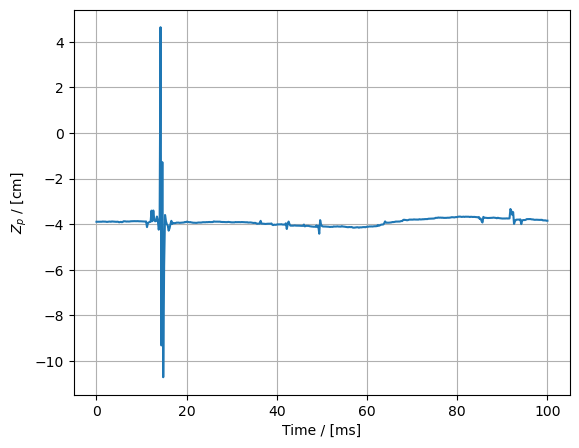

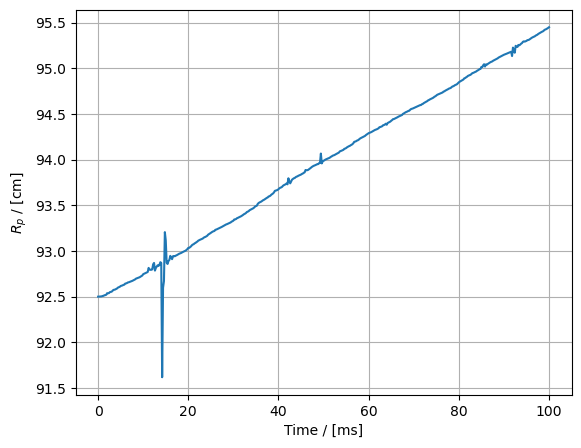

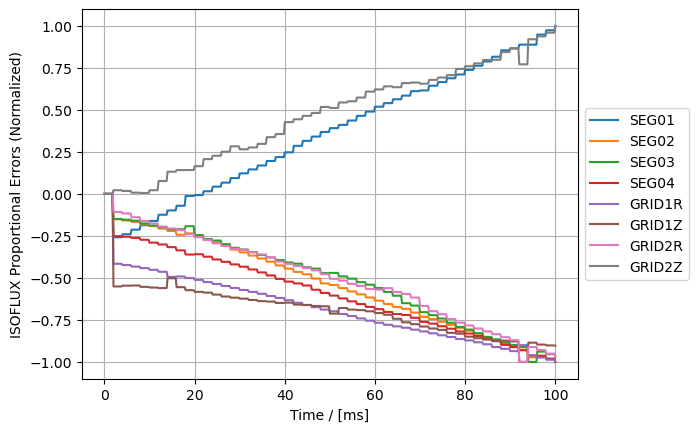

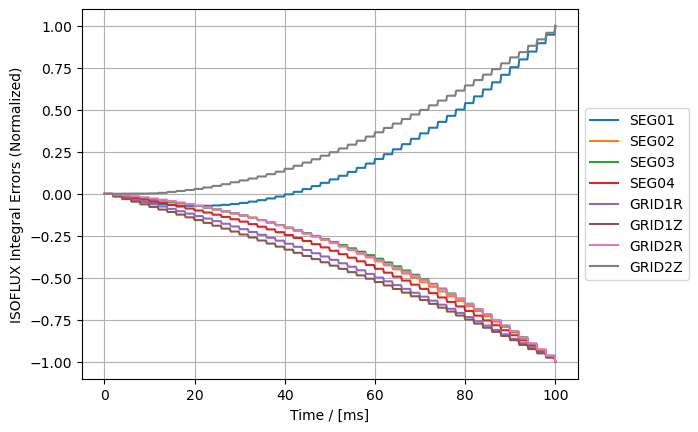

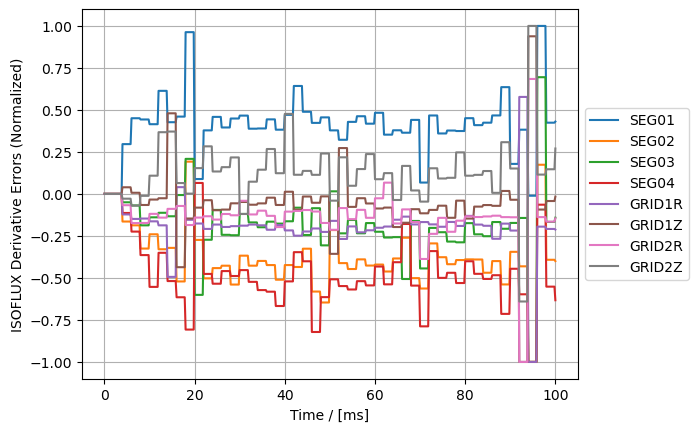

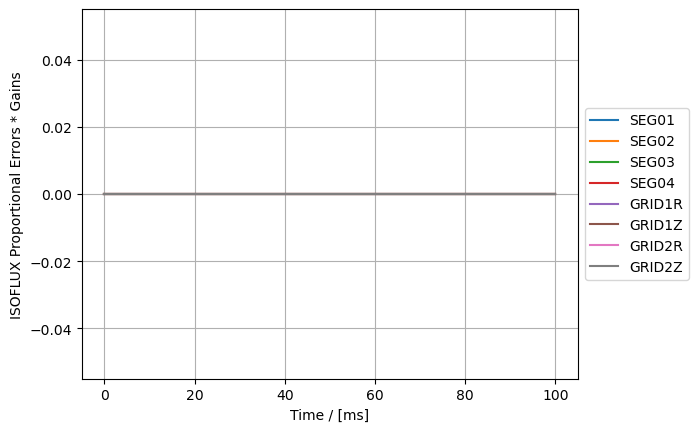

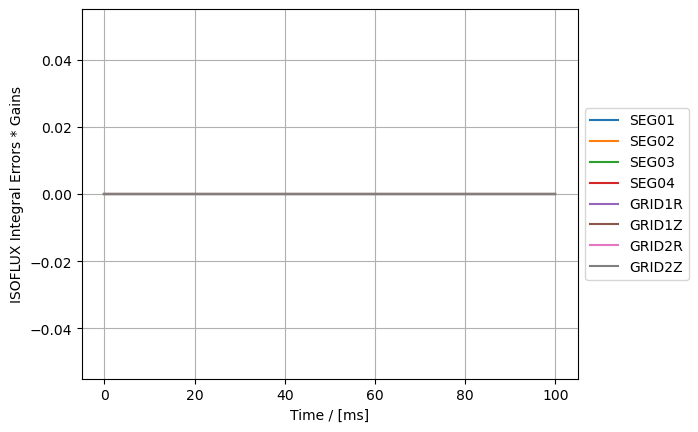

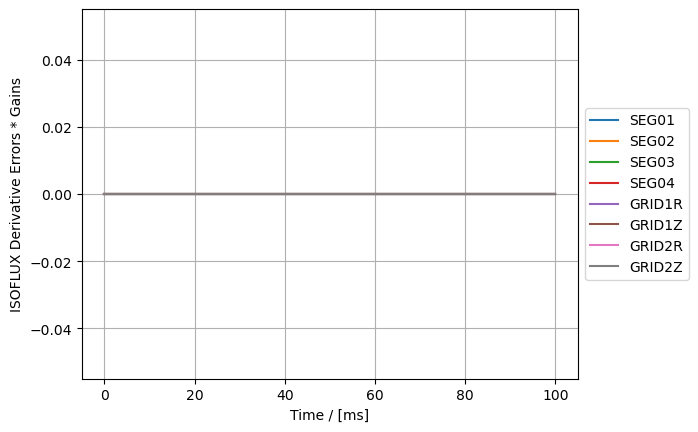

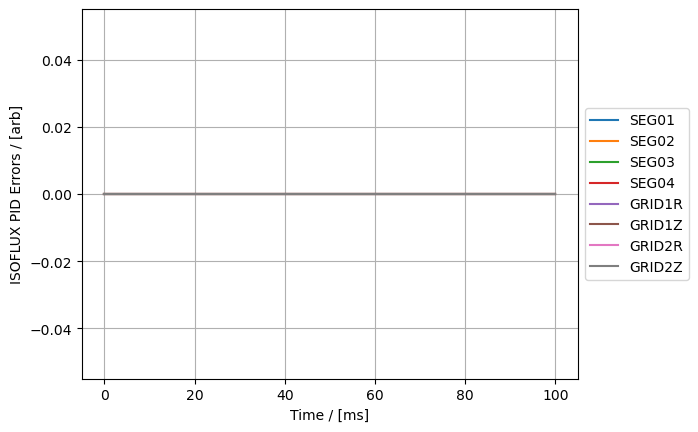

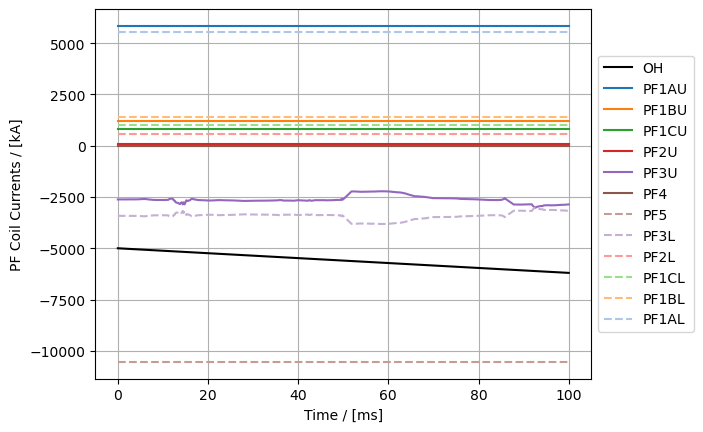

Making movie
Post Processing Complete


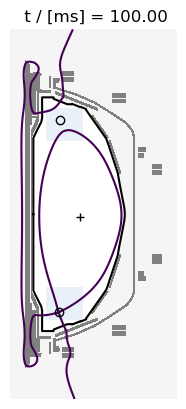

In [7]:
# Read input parameters and set up simulation
#####################################################

# Input dictionary defined above

# Set up TokaMaker environment
print('Setting up TokaMaker Model')
if 'myOFT' not in locals():
    myOFT = OFT_env(nthreads=2)
    mygs = TokaMaker(myOFT)
else:
    mygs.reset()

# Set up TokaMaker NSTX-U object
mygs = create_mygs_NSTXU(mygs)

# Set up initial state of TokaMaker
mygs, err_flag = setup_plasma(mygs, inputs)
if(err_flag < 0):
    sys.exit('Initial State Could not be created')

# Set Up PCS Variables
print('Setting up PCS')
PCS = PCS(inputs)

# Plasma States to track
print('Setting up Diagnostics')
STATES = STATES(mygs, PCS.N_its)

# Modify TokaMaker parameters
mygs.settings.pm=False
mygs.update_settings()
mygs.set_isoflux(None)
mygs.set_targets(Ip = PCS.IP[0], pax=inputs['PRES'][0,1])

# Simulation Updates
nplot = int(np.ceil(PCS.N_its/10))
nstatus = 10

# Format grid for interpolation
triObj = tri.Triangulation(mygs.r[:,0], mygs.r[:,1])

# Miscellaneous parameters
cp_errors_i = 0
dI_ISO = np.array([0,0,0,0,0,0,0,0,0,0,0,0])

#####################################################






# Run Simulation
#####################################################

# Start timer
print('Starting Simulation')
sim_time = 0.0
t_wall_0 = perf_counter()
np.random.seed(1)

for i in range(1, PCS.N_its+1):
    
    
    

    #####################################################
    # Derivative Voltage Control Algorithm for Vertical Stability
    
    # Plasma current centroid position
    ri = STATES.R_p[i-1]
    zi = STATES.Z_p[i-1]
    
    # Derivative Voltage Control (DVC)
    err_z = STATES.Z_p[0] - zi
    PCS.DVC_err_P[i] = err_z
    PCS.DVC_err_I[i] = PCS.DVC_err_I[i-1] + err_z * PCS.dt
    PCS.DVC_err_D[i] = (err_z - PCS.DVC_err_P[i-1]) / PCS.dt
    dI_DVC = PCS.DVC_err_P[i] * PCS.DVC_Gain_P[i] + PCS.DVC_err_I[i] * PCS.DVC_Gain_I[i] + PCS.DVC_err_D[i] * PCS.DVC_Gain_D[i]
    
    #####################################################
    
    
    

    #####################################################
    # ISOFLUX Shape Control Algorithm
    
    # Real-time equilibrium reconstruction in "slow" loop
    if(i % PCS.N_iso == 0):
        
        # Most recent equilibrium
        psi_i = STATES.psi[-1]
        
        # Find reference point and flux
        RZ_ref = mygs.lim_point.reshape((1,2))
        reference_flux = interp_fluxes(psi_i, triObj, RZ_ref)
        
        # Get flux at all control points
        RZ_cp = PCS.get_control_points_i(i)
        cp_fluxes = interp_fluxes(psi_i, triObj, RZ_cp)
        
        # Calculate flux errors at control points
        cp_errors_i = reference_flux - cp_fluxes
        
        # Find x-points
        RZ_xp = mygs.get_xpoints()[0]
        
        # Select x-point in each reference grid
        TF1_R_in = np.logical_and(RZ_xp[:,0] > PCS.ISO_GRID1_BOUNDS[0], 
                                  RZ_xp[:,0] < PCS.ISO_GRID1_BOUNDS[1])
        TF1_Z_in = np.logical_and(RZ_xp[:,1] > PCS.ISO_GRID1_BOUNDS[2], 
                                  RZ_xp[:,1] < PCS.ISO_GRID1_BOUNDS[3])
        TF_xp1 = np.logical_and(TF1_R_in, TF1_Z_in)
        
        if(np.any(TF_xp1)):
            RZ_xp1 = RZ_xp[TF_xp1,:]
        
        TF2_R_in = np.logical_and(RZ_xp[:,0] > PCS.ISO_GRID2_BOUNDS[0], 
                                  RZ_xp[:,0] < PCS.ISO_GRID2_BOUNDS[1])
        TF2_Z_in = np.logical_and(RZ_xp[:,1] > PCS.ISO_GRID2_BOUNDS[2], 
                                  RZ_xp[:,1] < PCS.ISO_GRID2_BOUNDS[3])
        TF_xp2 = np.logical_and(TF2_R_in, TF2_Z_in)
        
        if(np.any(TF_xp2)):
            RZ_xp2 = RZ_xp[TF_xp2,:]
        
        # Get x-point targets
        RZ_xt = PCS.get_xpt_targets_i(i)
        
        # Calculate x-point position errors
        xp_errors_i = np.array([RZ_xt[0,0]-RZ_xp1[0,0], RZ_xt[0,1]-RZ_xp1[0,1],
                                RZ_xt[1,0]-RZ_xp2[0,0], RZ_xt[1,1]-RZ_xp2[0,1]])
        
        # Update PID errors
        errors_P_i = np.concatenate((cp_errors_i, xp_errors_i), axis=0)
        errors_P, errors_I, errors_D = PCS.calc_iso_errors_i(errors_P_i, i)
        if(i == PCS.N_iso):
            errors_D = errors_D * 0.0
        PCS.update_iso_errors_i(errors_P, errors_I, errors_D, i)
        
        # Map PID errors to coils
        dI_ISO = PCS.calc_iso_commands(i)
        
    else:
        
        # "Extrapolate" from previous point
        errors_P, errors_I, errors_D = PCS.extrap_iso_errors_i(i)
        PCS.update_iso_errors_i(errors_P, errors_I, errors_D, i)
    
    #####################################################
    
    
    
    
    #####################################################
    # Update IP Current target
    
    # Modify plasma current target
    mygs.set_targets(Ip=PCS.IP[i])
    
    #####################################################
    
    
    
    
    #####################################################
    # Update coil currents
    
    mygs = update_coilcurrents(mygs, PCS.dt, dI_ISO, dI_DVC, PCS.IOH[i])
    
    #####################################################
    
    
    
    
    #####################################################
    # Iterate simulation and measure new state
    
    # Iterate simulation
    sim_time, _, nl_its, lin_its, nretry = mygs.step_td(sim_time, PCS.dt)
        
    # Update measurements of evolved system
    STATES.update(mygs, i, PCS.N_iso)
    
    # Print status
    if(i % nstatus == 0):
        print('{0:.5E} {1:4d} {2:4d} {3:4d}'.format(sim_time,nl_its,lin_its,nretry))
    
    # Check for terminal conditions
    if( nretry < 0 ):
        print('Solver failed at iteration: ', i)
        break
    if( abs(STATES.Z_p[i]) > 0.2 ):
        print('Vertical position control lost at time [ms]:', i*PCS.dt*1000)
        break
    if( not mygs.diverted ):
        print('Plasma hit the wall')
        break
    
    #####################################################
        
        
# Final time check
t_wall_end = perf_counter()
print('Simulation Complete')
print('Total time [s] = {0:8.3f}'.format(t_wall_end-t_wall_0))

#####################################################






# Process results
#####################################################
print('Post Processing')
save_simulation_results(inputs, mygs, PCS, STATES)

#####################################################